In [120]:
import copick
import zarr
from matplotlib import pyplot as plt

In [121]:
def get_static_tomogram(run_name,split='train',tomo_type = 'denoised',zarr_group_idx=0):
    
    copick_root = get_copick_root(split)  
    
    run = copick_root.get_run(run_name)
    
    voxel_spacing = run.get_voxel_spacing(10.000)

    # Access the specific tomogram
    tomogram = voxel_spacing.get_tomogram(tomo_type)
    
    # Access the Zarr data
    zarr_store = tomogram.zarr()
    zarr_group = zarr.open(zarr_store)
    
    # Load the tomogram data
    tomogram_vals = zarr_group[zarr_group_idx]  # Adjust the key if needed

    return tomogram_vals

def get_copick_root(split):
    if split=='train':
        copick_root = copick.from_file('../../copick_config.json')
    elif split=='test':
        copick_root = copick.from_file('../../copick_config_test.json')
    else:
        raise ValueError('Split must be either "train" or "test"')
    
    return copick_root

In [122]:
training_runs = get_copick_root('train').runs
testing_runs = get_copick_root('test').runs

training_run_names = [run.name for run in training_runs]
testing_run_names = [run.name for run in testing_runs]
extra_training_run_names = list(set(training_run_names) - set(testing_run_names))

print(f'Training runs: {training_run_names}')
print(f'Testing runs: {testing_run_names}')

Training runs: ['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9']
Testing runs: ['TS_5_4', 'TS_69_2', 'TS_6_4']


In [123]:
tomograms_train = {}
tomograms_test = {}

for training_run_name in training_run_names:
    tomograms_train[training_run_name] = get_static_tomogram(split='train',run_name=training_run_name)
for testing_run_name in testing_run_names:
    tomograms_test[testing_run_name] = get_static_tomogram(split='test',run_name=testing_run_name)
    
print(f'Number of train tomograms: {len(tomograms_train)}')
print(f'Number of test tomograms: {len(tomograms_test)}')

Number of train tomograms: 7
Number of test tomograms: 3


In [144]:
print(type(tomograms_train['TS_5_4']))
print(type(tomograms_train['TS_5_4'][0]))
print(type(tomograms_train['TS_5_4'][0][0][0]))
print(tomograms_test['TS_5_4'].shape)

<class 'zarr.core.Array'>
<class 'numpy.ndarray'>
<class 'numpy.float32'>
(184, 630, 630)


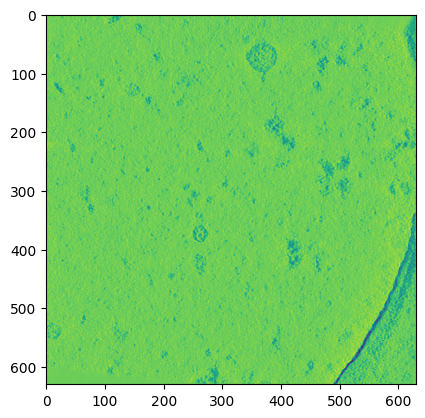

In [130]:
plt.imshow(tomograms_train['TS_5_4'][90])
plt.show()